# 4. 决策树 练习II

学号：2018212212229

姓名：华勤达

   

对于贷款违约数据集构建决策树进行剪枝

1. 数据导入和清洗

In [2]:
import pandas as pd

train_data = pd.read_csv('cs-training(2).csv')

feature_names = ['个人信用贷款/授信额度','借款人年龄','逾期30-59天次数','债务收入比','贷款数量']
drop_features = ['Unnamed: 0','MonthlyIncome','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
                 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
target_names = ['正常','违约']

train_data = train_data.drop(drop_features, axis=1).dropna()
X = train_data.drop(["SeriousDlqin2yrs"], axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((150000, 5), (150000,))

2. 分训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.4, random_state=0)

3. 利用学习曲线，确定最优max_depth

首先构建决策树，绘制学习曲线

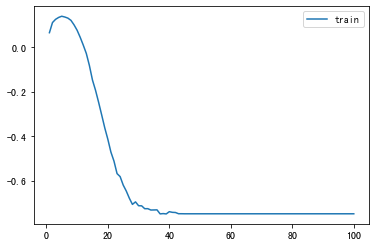

0.13951792224761417
5


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

#请完成代码,构建决策树，通过调整决策树最大深度来绘制学习曲线
from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(max_depth=2)
maxDepth = 100
train_scores = []
test_scores = []
for i in range(1, maxDepth+1):
    dt_reg = DecisionTreeRegressor(random_state=10,splitter="best",max_depth=i,criterion='mse')
    dt_reg.fit(X_train, y_train)
#     y_train_predict = dt_reg.predict(X_train)
    score = dt_reg.score(X_test, y_test) #返回预测的准确度accuracy
    train_scores.append(score)
#     test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxDepth+1)], train_scores, label="train")
# plt.plot([i for i in range(1, maxDepth+1)], test_scores, label="test")
# plt.xlim(506, 1)
plt.legend()
plt.show()
print(max(train_scores))
print(train_scores.index(max(train_scores))+1)

确定最优决策树深度，训练模型，得到模型在测试集的准确率，F1值。

In [32]:
#请完成代码，按照学习曲线显示情况，选择最佳决策树深度，训练模型，获得模型的准确率和F1值。
# 最佳决策树深度为5
tree_clf = DecisionTreeClassifier(random_state=30,splitter="random",max_depth=5,criterion="gini")
tree_clf.fit(X_train, y_train)
score = tree_clf.score(X_test, y_test)
print(score)
y_pred = tree_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9330833333333334
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     55981
           1       0.53      0.01      0.02      4019

    accuracy                           0.93     60000
   macro avg       0.73      0.50      0.49     60000
weighted avg       0.91      0.93      0.90     60000



4. 显示决策树

决策树设置最大深度为3，显示决策树

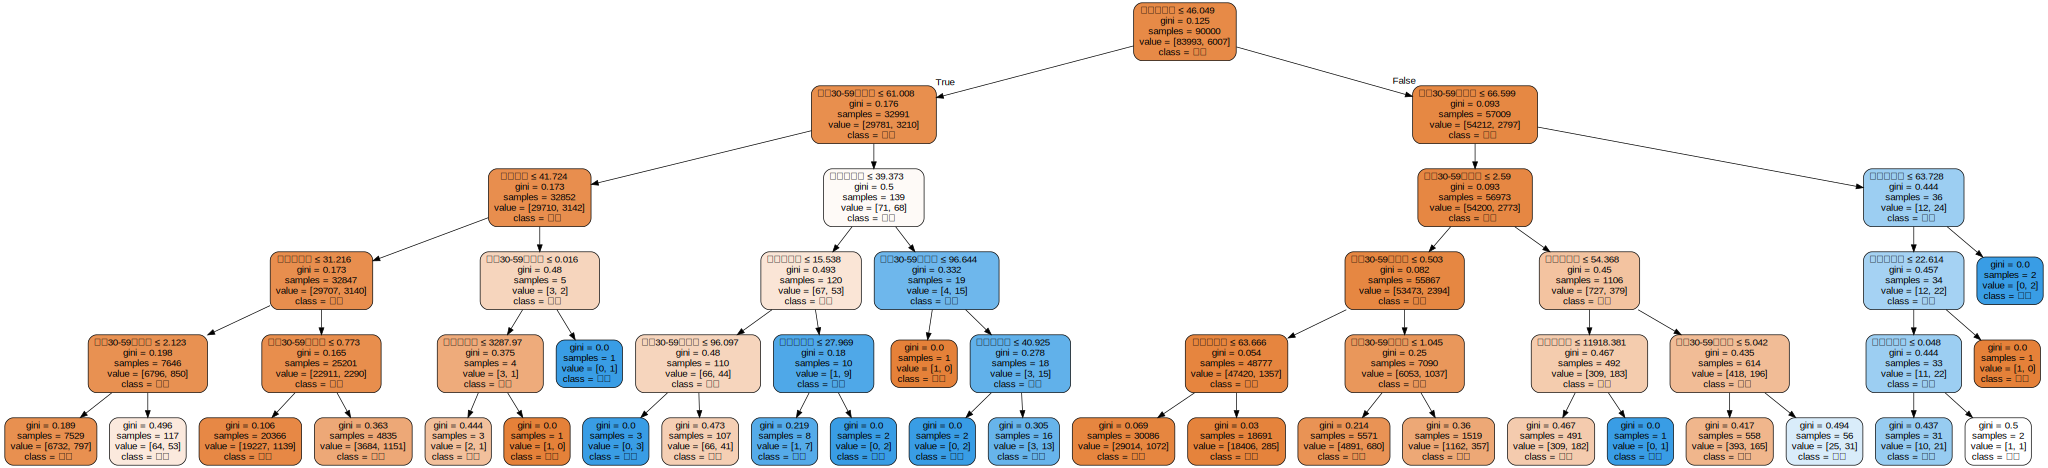

In [33]:
from sklearn.tree import export_graphviz
import graphviz

#请完成代码，设置树的深度，训练模型，显示决策树。
dot_data = export_graphviz(tree_clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph